In [1]:
from csoundengine import *

In [2]:
e = Engine()
s = e.session()

--Csound version 7.0 (double samples) May 25 2025
[commit: 909a4017d2810e4d6fddb735314670e5dfdf7a15]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:



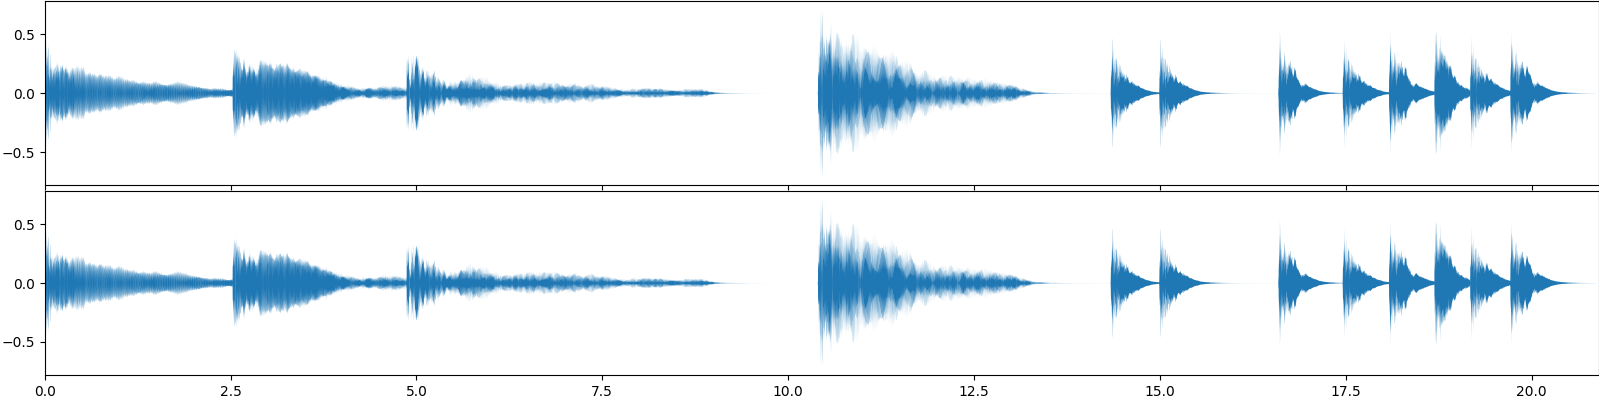

In [3]:
with s.rendering("tmp/rectest.flac") as r:
    r.playSample("../snd/piano-pitchtest-2.flac", speed=0.5)
r

In [4]:
import sndfileio
samples, sr = sndfileio.sndread("../snd/piano-pitchtest-2.flac")

In [5]:
from csoundengine.offline import OfflineSession
s2 = OfflineSession(withBusSupport=False)


In [6]:
s2.playSample((samples, sr), speed=0.5)

SchedEvent(p1=50.0001, start=0.0, dur=20.858866213151927, uniqueId=0, args=[-1, 2, 0.0, 0.02, 0.02, 1, 0.5, 1.0, 0.5, -1], instrname=.playSample, priority=1)

In [7]:
job = s2.render()

In [8]:
job.outfile

'/tmp/tmpao4o1sf2.wav'

In [9]:
s2.writeCsd("~/tmp/offline.csd")


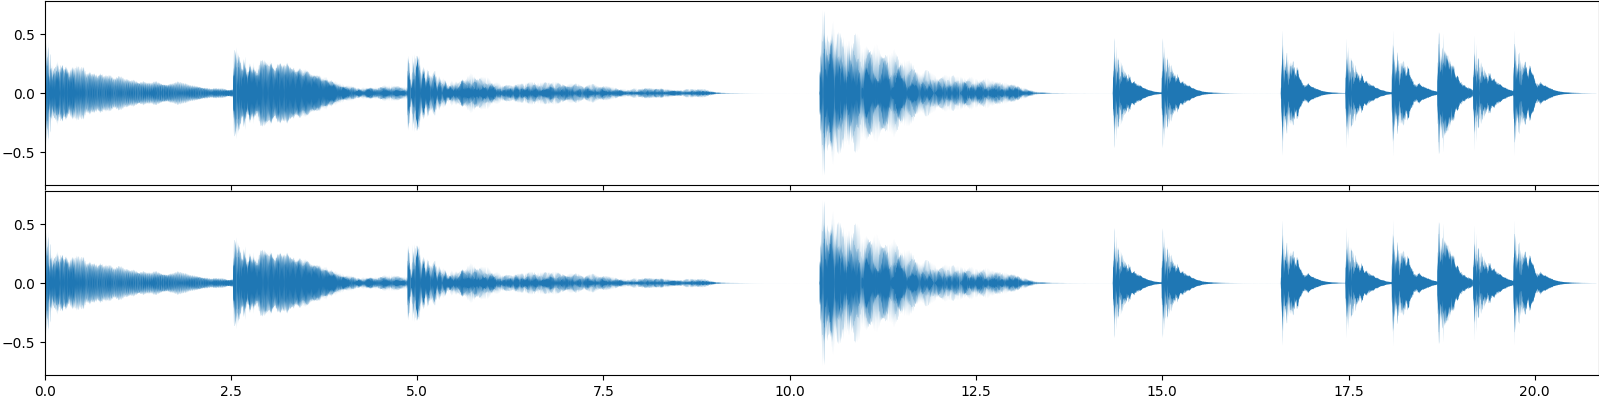

In [10]:
with s.rendering("tmp/rectest-samples.flac") as r:
    r.playSample((samples, sr), speed=0.5)
r


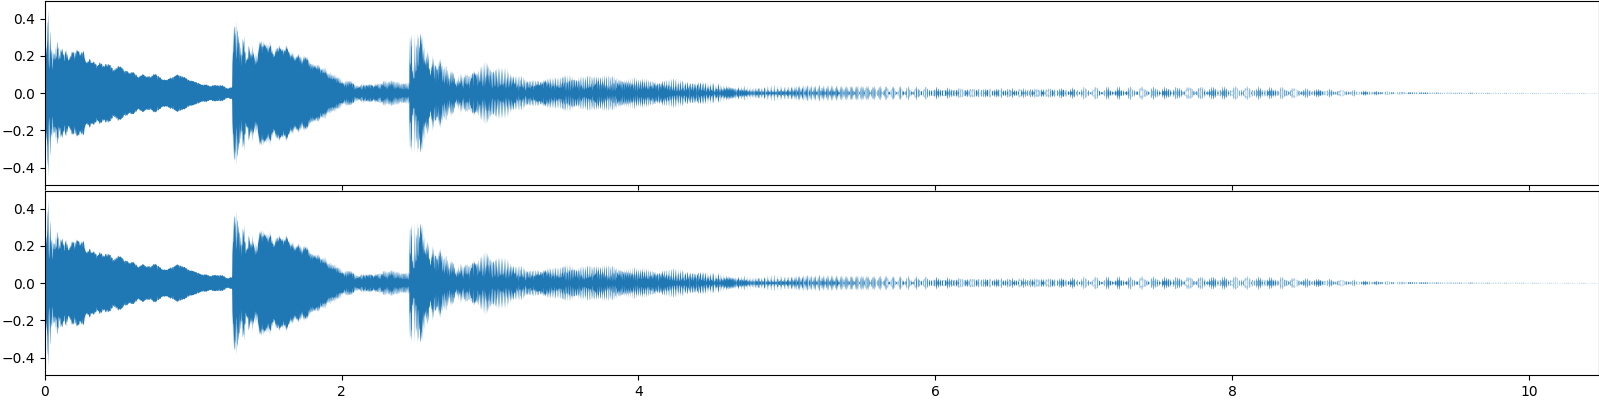

In [11]:
with s.rendering("tmp/rectest.flac") as r:
    ev = r.playSample("../snd/piano-pitchtest-2.flac")
    ev.automate('kspeed', (0, 1, 4, 0.1), delay=2)
r

In [4]:
r.writeCsd("~/tmp/test.csd")

In [12]:
s.defInstr('sine', r'''
|iamp=0.1, kfreq=1000|
a0 = oscili:a(iamp, lag:k(kfreq, 0.1))
a0 *= cossegr:a(0, 0.01, 1, 0.1, 0)
outch 1, a0
''')

Instr(sine, iamp=0.1, kfreq=1000)

In [13]:
ev = s.sched('sine', 0, 4, kfreq=442, iamp=0.2)
ev.set('kfreq', 800, delay=2)
ev

Button(description='Stop', style=ButtonStyle())

Output()

Synth(‖ sine=401.0002 start=31.422 dur=4 iamp=0.2 kfreq=442)

RenderJob(outfile='/home/em/tmp/sine.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=4.0, process=<Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/home/em/tmp/si...>)
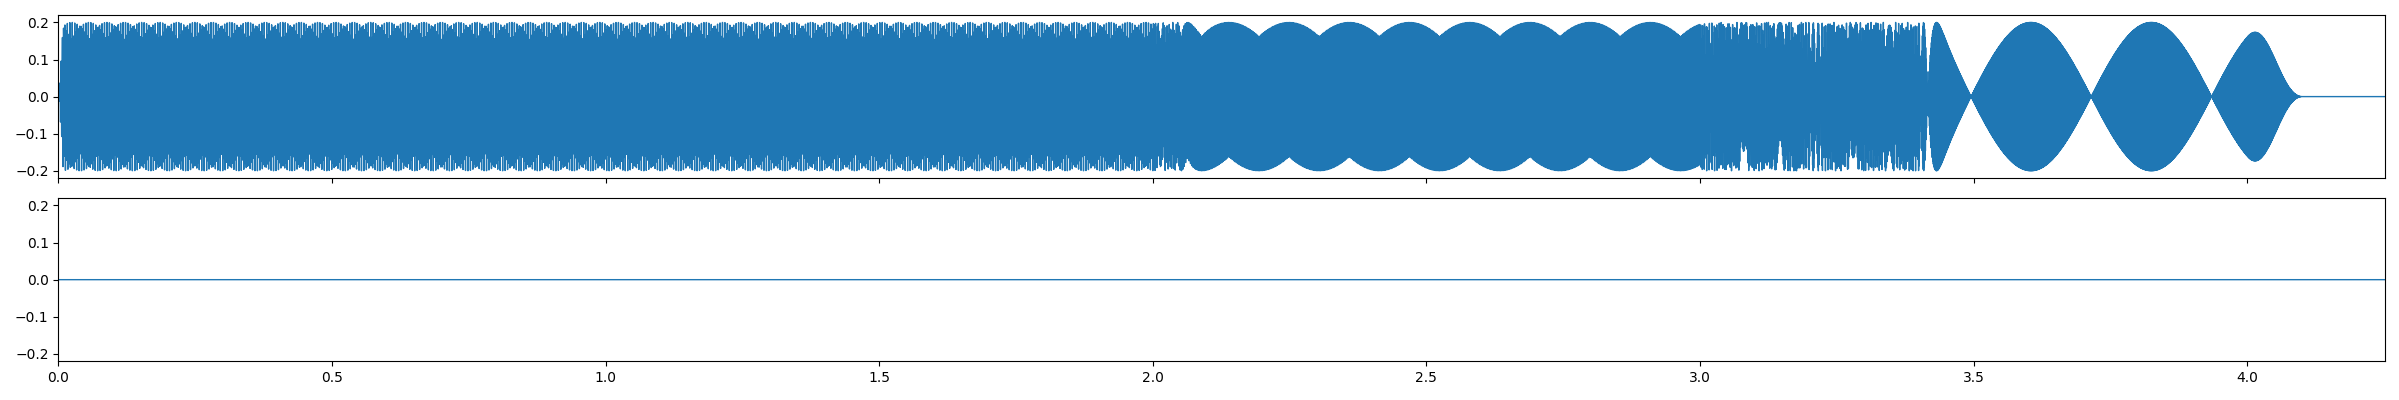

In [14]:
r = s.makeRenderer()
event = r.sched('sine', 0, 4, kfreq=442, iamp=0.2)
event.set(kfreq=800, delay=2)
event.automate("kfreq", (0, 1000, 0.1, 500, 0.2, 1000, 0.3, 500, 0.4, 1000), delay=3, overtake=True)
r.writeCsd('~/tmp/sine.csd')
r.render('~/tmp/sine.wav', tail=0.25)


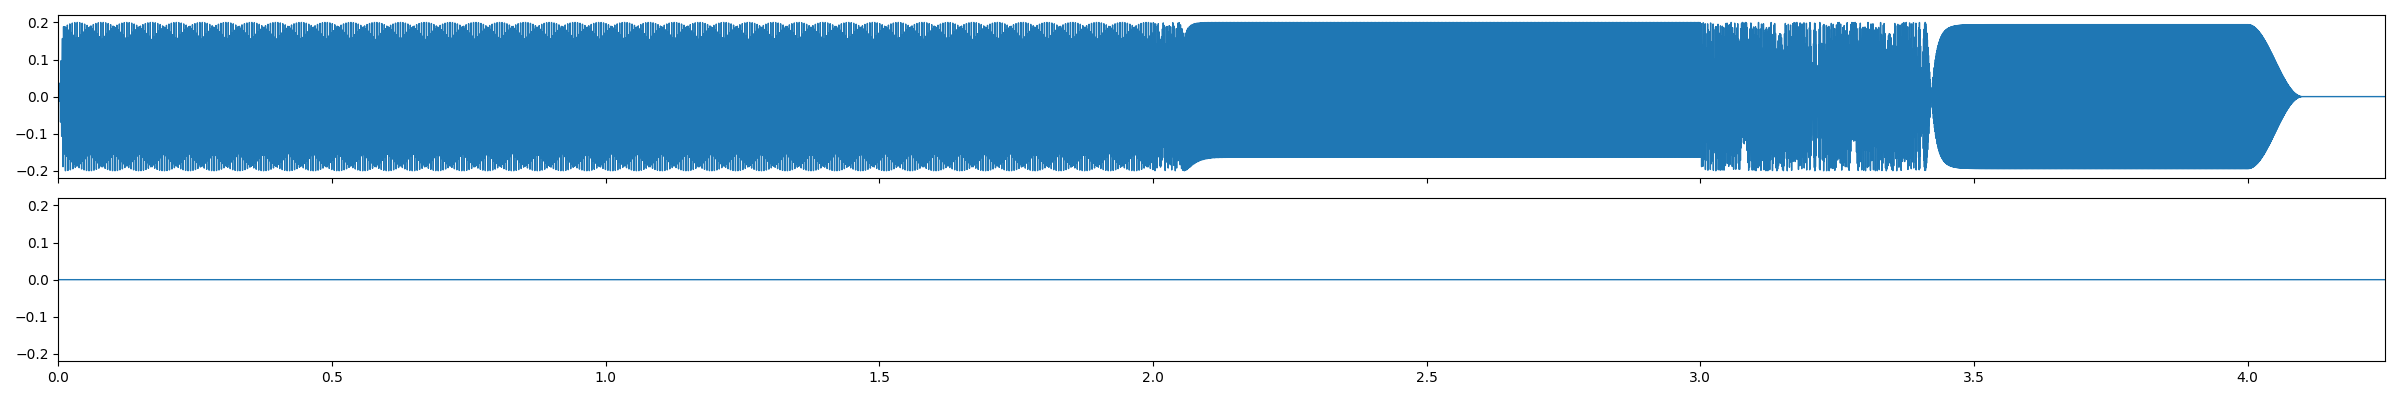

In [15]:
with s.rendering(tail=0.25) as r:
    event = s.sched('sine', 0, 4, kfreq=442, iamp=0.2)
    event.set(kfreq=800, delay=2)
    event.automate("kfreq", (0, 1000, 0.1, 500, 0.2, 1000, 0.3, 500, 0.4, 1000), delay=3, overtake=True)
r